In [60]:
# Imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure


# **Calibración del histograma (o expansión del contraste)**

# **Ecualización del histograma**

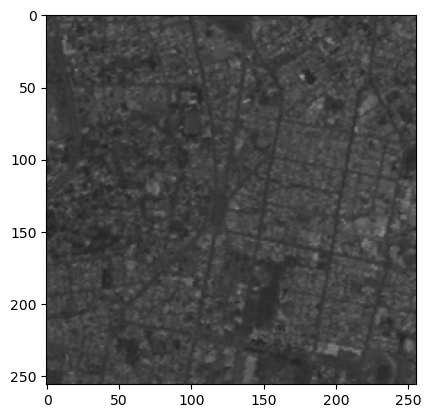

In [79]:
quito = cv2.imread('images/QUITO.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(quito, cmap='gray', vmin=0, vmax=255)
plt.show()

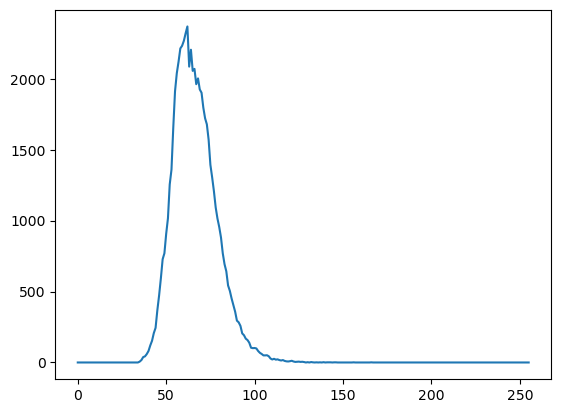

In [80]:
quitoHist = cv2.calcHist([quito], [0], None, [256], [0, 256])
plt.plot(quitoHist)
plt.show()

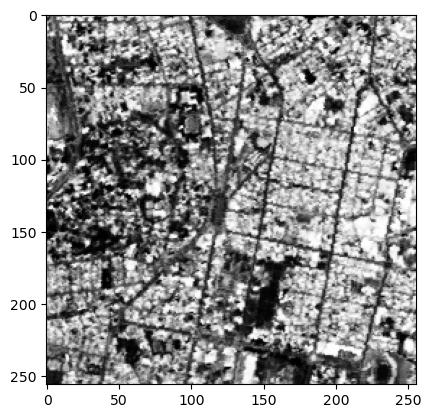

In [81]:
quitoEciqualized = cv2.equalizeHist(quito)
plt.imshow(quitoEciqualized, cmap='gray', vmin=0, vmax=255)
plt.show()

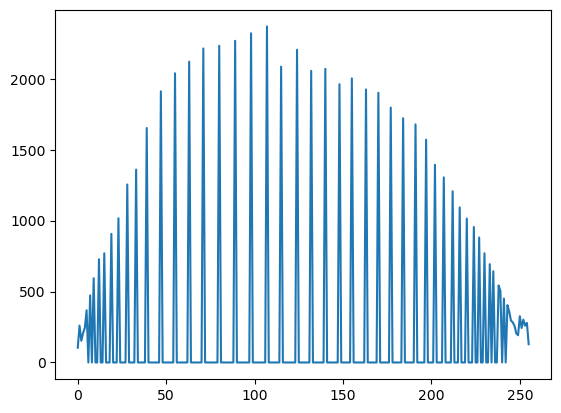

In [82]:
histQuitoEcualized = cv2.calcHist([quitoEciqualized], [0], None, [256], [0, 256])
plt.plot(histQuitoEcualized)
plt.show()

 **¿a qué se debe la discontinuidad del histograma ecualizado?**

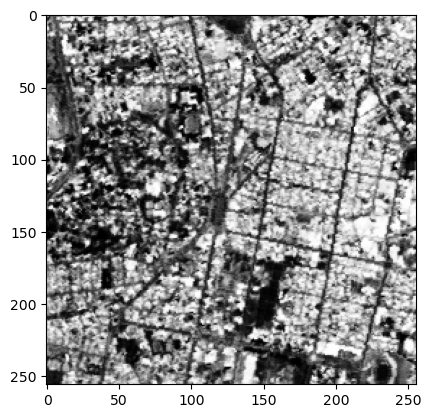

In [83]:
quitoEciqualized2 = cv2.equalizeHist(quitoEciqualized)
plt.imshow(quitoEciqualized2, cmap='gray', vmin=0, vmax=255)
plt.show()

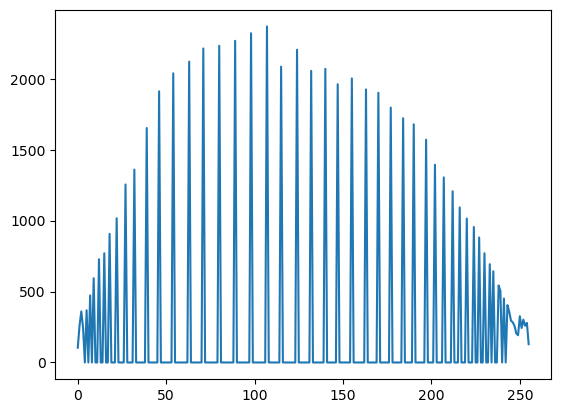

In [84]:
histQuitoEcualized2 = cv2.calcHist([quitoEciqualized2], [0], None, [256], [0, 256])
plt.plot(histQuitoEcualized2)
plt.show()

**¿Qué pasa? ¿Por qué?**

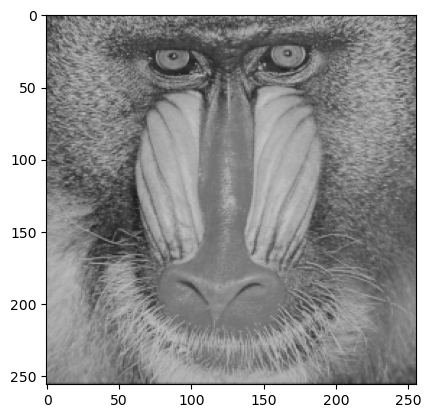

In [61]:
baboon = cv2.imread('images/BABOON.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(baboon, cmap='gray', vmin=0, vmax=255)
plt.show()

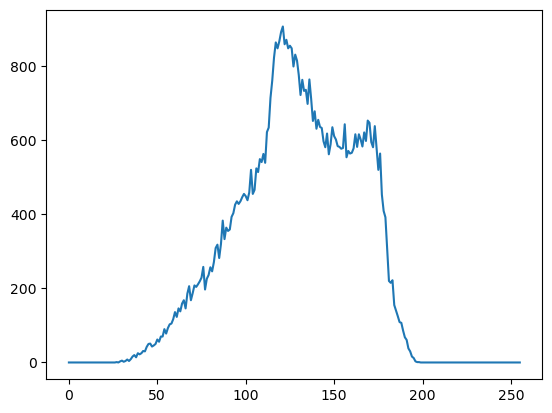

In [62]:
baboonHist = cv2.calcHist([baboon], [0], None, [256], [0, 256])
plt.plot(baboonHist)
plt.show()

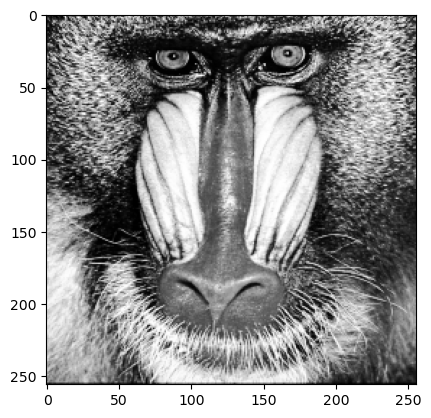

In [63]:
baboonEqualized = cv2.equalizeHist(baboon)
plt.imshow(baboonEqualized, cmap='gray', vmin=0, vmax=255)
plt.show()

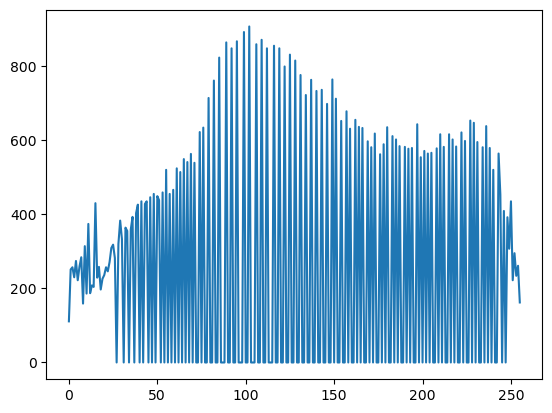

In [64]:
histBaboonEqualized = cv2.calcHist([baboonEqualized], [0], None, [256], [0, 256])
plt.plot(histBaboonEqualized)
plt.show()

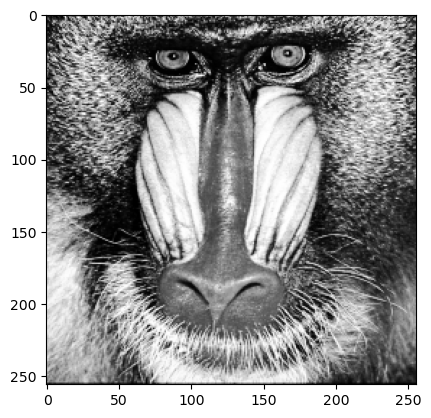

In [65]:
baboonEqualized2 = cv2.equalizeHist(baboonEqualized)
plt.imshow(baboonEqualized2, cmap='gray', vmin=0, vmax=255)
plt.show()

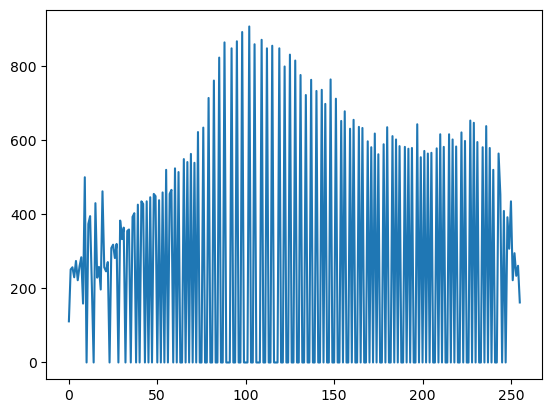

In [78]:
histBaboonEqualized2 = cv2.calcHist([baboonEqualized2], [0], None, [256], [0, 256])
plt.plot(histBaboonEqualized2)
plt.show()

**¿Cómo es el resultado de esta transformación comparado con la ecualización de la imagen precedente (quito.png)? ¿Por qué?**

# **Comparación entre diferentes transformaciones del histograma**

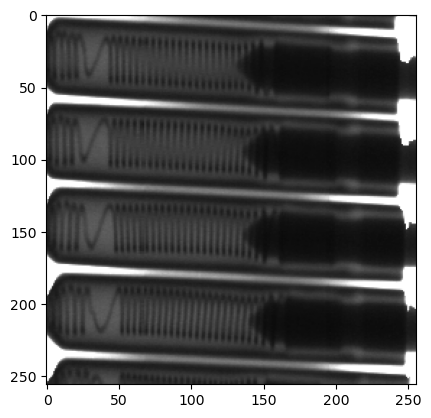

In [66]:
bougies = cv2.imread('images/BOUGIES.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(bougies, vmin=0, vmax=255, cmap='gray')
plt.show()

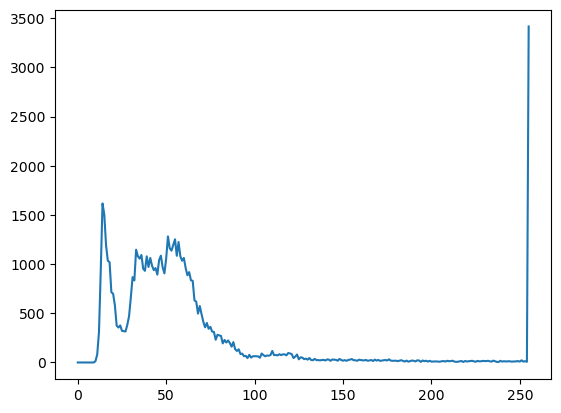

Mínimo: 10, Máximo: 255


In [67]:
hist = cv2.calcHist([bougies],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()
miniomo = np.min(bougies)
maxiomo = np.max(bougies)
print(f'Mínimo: {miniomo}, Máximo: {maxiomo}')

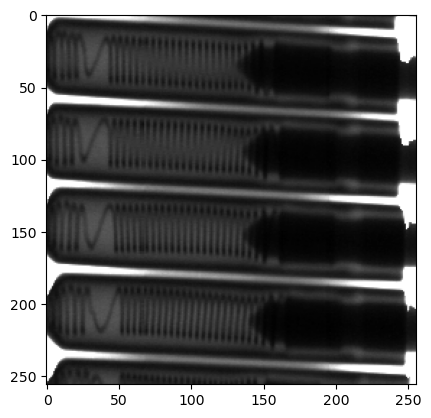

In [68]:
bougieRescaled = exposure.rescale_intensity(bougies, in_range=(10,255), out_range=(0,255))
bougieRescaled = bougieRescaled.astype(np.uint8)
plt.imshow(bougieRescaled, vmin=0, vmax=255, cmap='gray')
plt.show()


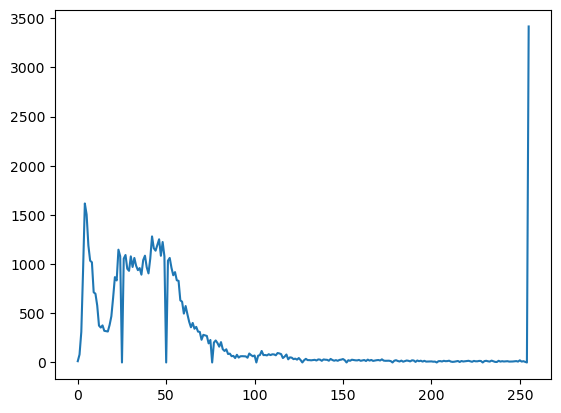

In [69]:
hist = cv2.calcHist([bougieRescaled],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

## **¿A qué se debe este resultado?**

**Respuesta**

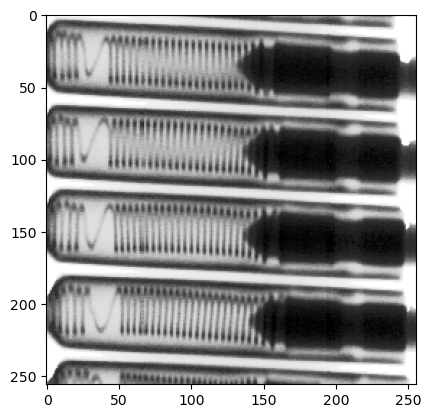

In [70]:
bougieEcualizado = cv2.equalizeHist(bougies)
plt.imshow(bougieEcualizado, vmin=0, vmax=255, cmap='gray')
plt.show()

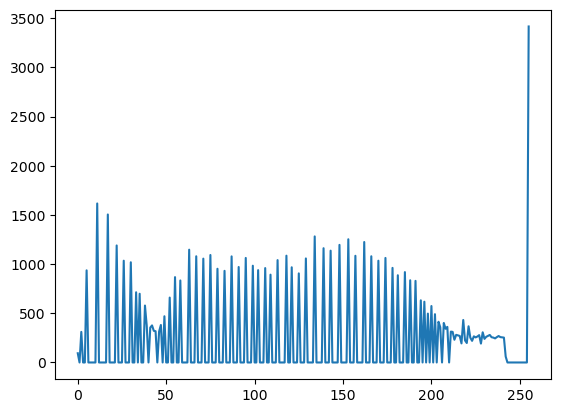

In [71]:
histBougieEcualizado = cv2.calcHist([bougieEcualizado],[0],None,[256],[0,256])
plt.plot(histBougieEcualizado)
plt.show()

**Compare las imágenes resultado de la expansión (punto anterior) y de la ecualización (resultado actual), junto con sus histogramas. Comente sus observaciones.**

## **Comparacion**

C:\Users\santi\AppData\Local\Temp\ipykernel_37740\87853339.py:5: RuntimeWarning: overflow encountered in scalar add
  bougieLog[i,j] = np.log1p(bougies[i,j] + 1)


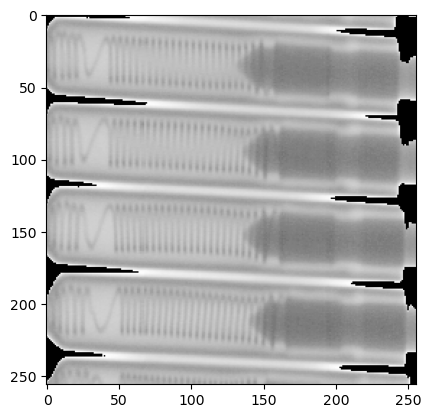

In [72]:
bougieLog = np.zeros(bougies.shape)

for i in range(bougies.shape[0]):
    for j in range(bougies.shape[1]):
        bougieLog[i,j] = np.log1p(bougies[i,j] + 1)

bougieMultiply = cv2.multiply(bougieLog, 46)
bougieMultiply = bougieMultiply.astype(np.uint8)

plt.imshow(bougieMultiply, vmin=0, vmax=255, cmap='gray')
plt.show()

**Responder**
¿Por qué es necesario multiplicar la imagen de salida por un factor?

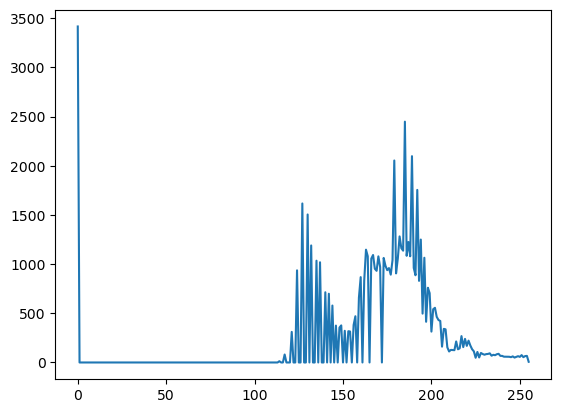

In [73]:
histBougieMulty = cv2.calcHist([bougieMultiply],[0],None,[256],[0,256])
plt.plot(histBougieMulty)

**¿Cómo es el histograma resultado?**

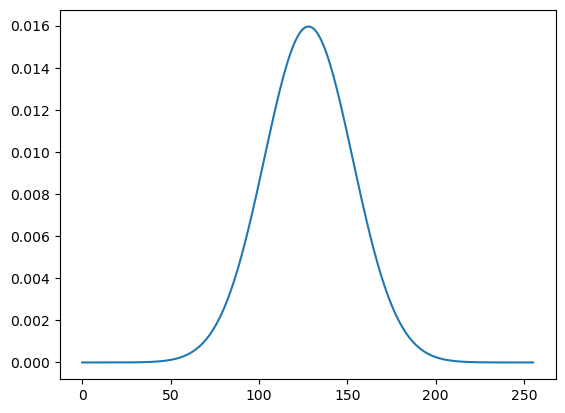

In [74]:
#Crear el histograma normal con forma de campana 
L = 256
x = np.arange(L)

mu = 128 # media 
sigma = 25 # desviación 
hist_normal = np.exp(-0.5 * ((x - mu) / sigma)**2)
hist_normal = hist_normal / hist_normal.sum() # normalizar a suma 1
plt.plot(x, hist_normal)

In [75]:
# Especificacion del histograma

N, M = bougies.shape
#Generamos la distribución acumulativa del histograma
cdf = np.cumsum(hist_normal)
#Generamos un arreglo con valores aleatorios según la distribución
pixel_values  = np.interp(np.random.rand(N*M), cdf, range(0,L))
#Convertimos el arreglo en una imagen.
i_to_match= pixel_values.reshape(N,M).astype(np.uint8)
matched_image = exposure.match_histograms(bougies, i_to_match)


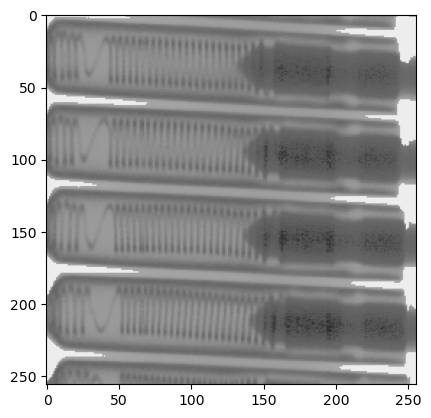

In [76]:
matched_image = matched_image.astype(np.uint8)
plt.imshow(matched_image, vmin=0, vmax=255, cmap='gray')
plt.show()

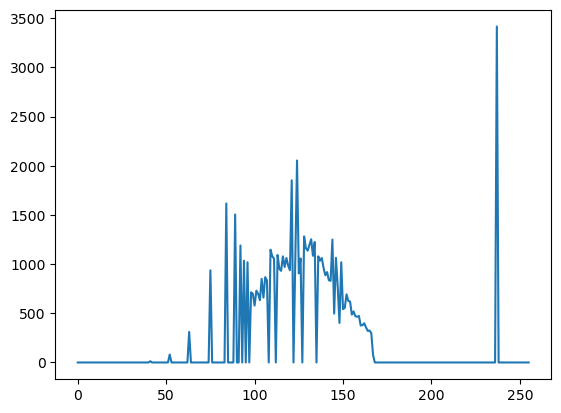

In [77]:
histMatched = cv2.calcHist([matched_image],[0],None,[256],[0,256])
plt.plot(histMatched)


**Observaciones sobre los histogrmas**

**Haga una comparación entre los tipos de transformaciones ¿Qué impactos tiene cada una? ¿Cómo  pueden ser usadas en el ámbito de mejoramiento de la calidad de la imagen?**

# **Umbralización simple**

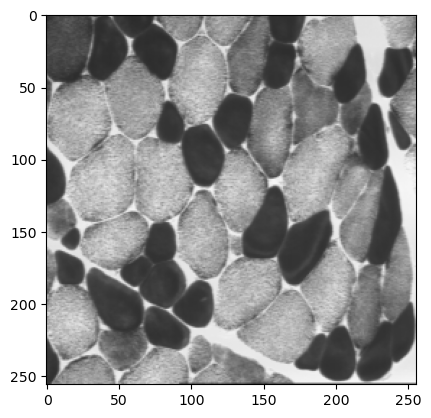

In [85]:
muscle = cv2.imread('images/MUSCLE.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(muscle, vmin=0, vmax=255, cmap='gray')
plt.show()

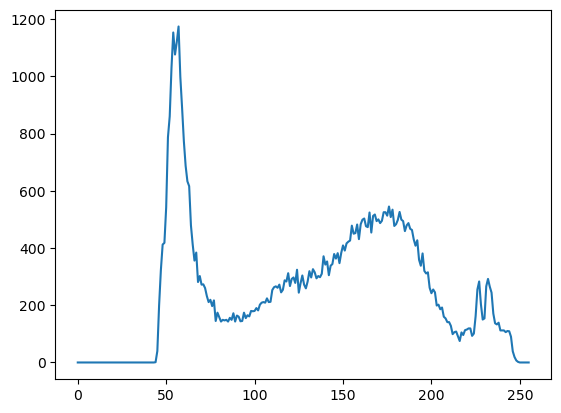

Mínimo: 44, Máximo: 249


In [88]:
muscleHist = cv2.calcHist([muscle], [0], None, [256], [0, 256])
plt.plot(muscleHist)
plt.show()
np.min(muscle), np.max(muscle)
print(f'Mínimo: {np.min(muscle)}, Máximo: {np.max(muscle)}')

**¿Cuál es este valor?**

El valor escogido es 90, debido a que en el histograma se distinguen dos regiones principales: un pico pronunciado en intensidades bajas entre 50 y 60 aproximadamente, asociado a las fibras más oscuras, y una distribución más elevada en intensidades altas entre 120 y 200 aproximadamente, correspondiente a las fibras más claras y el fondo. Entre ambos grupos aparece un “valle” donde la frecuencia de píxeles disminuye notablemente, aproximadamente entre 80 y 100. Por lo tanto, seleccionar 90, ubicado en esa zona de mínima superposición, permite separar mejor las fibras negras de las blancas, reduciendo la cantidad de píxeles ambiguos que podrían clasificarse incorrectamente.

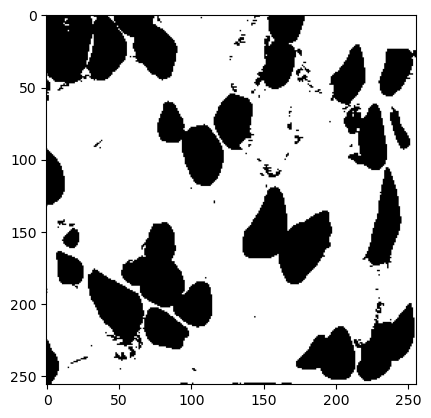

In [91]:
muscleRescaled = exposure.rescale_intensity(muscle, in_range=(90,91), out_range=(0,255))
muscleRescaled = muscleRescaled.astype(np.uint8)
plt.imshow(muscleRescaled, vmin=0, vmax=255, cmap='gray')
plt.show()

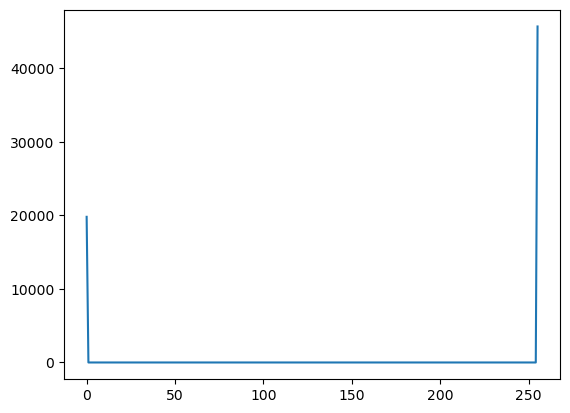

In [92]:
histMuscleRescaled = cv2.calcHist([muscleRescaled], [0], None, [256], [0, 256])
plt.plot(histMuscleRescaled)
plt.show()

**¿Cuál es su conclusión?**

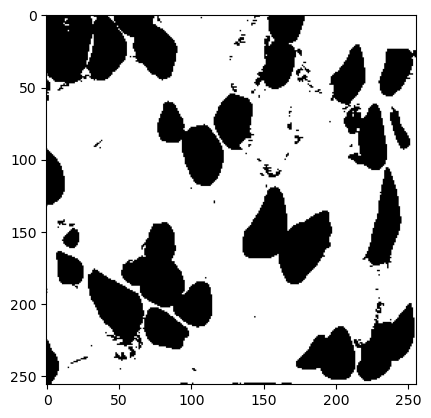

90.0


In [106]:
muscleRescaled2 = cv2.threshold(muscle, 90, 255, cv2.THRESH_BINARY)
plt.imshow(muscleRescaled2[1], vmin=0, vmax=255, cmap='gray')
plt.show()
print(muscleRescaled2[0])

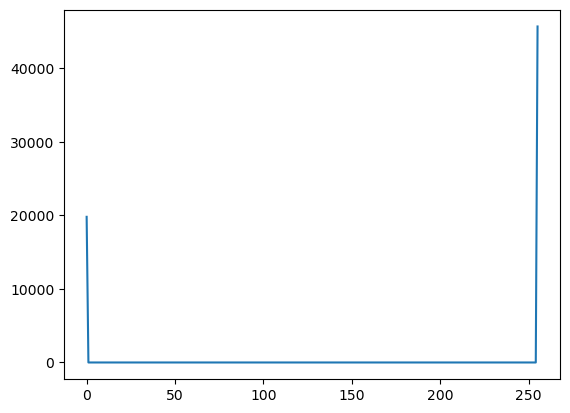

In [103]:
histMuscleRescaled2 = cv2.calcHist([muscleRescaled2[1]], [0], None, [256], [0, 256])
plt.plot(histMuscleRescaled2)
plt.show()

Valor de umbral encontrado por Otsu: 125.0


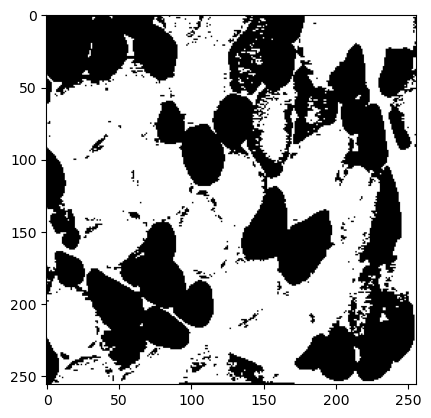

In [107]:
T, otsu = cv2.threshold(muscle, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(f'Valor de umbral encontrado por Otsu: {T}')
plt.imshow(otsu, vmin=0, vmax=255, cmap='gray')
plt.show()

**¿Qué resultado dan los métodos de umbralización automática (Otsu) basados sobre la varianza? ¿Cómo eligen estos métodos el umbral a aplicar?**